# MLOPS INTRO

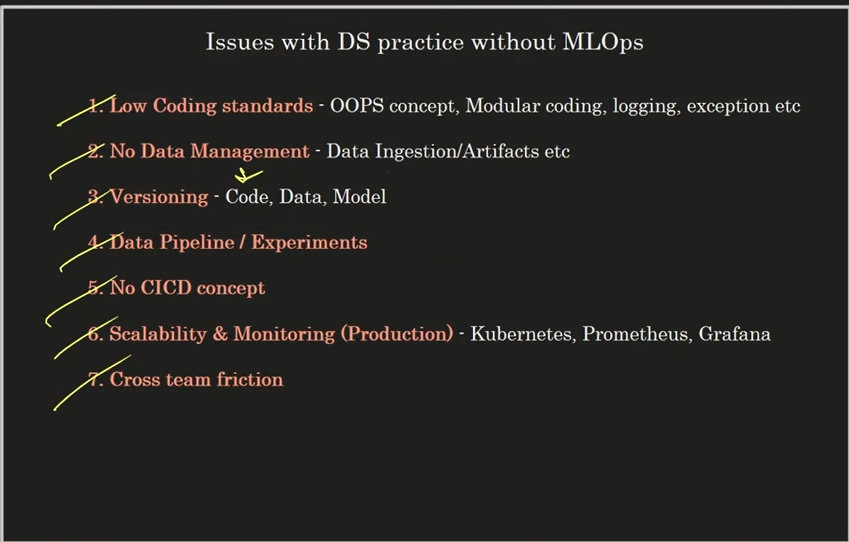

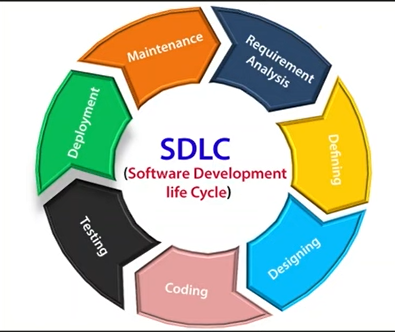

Versioning -> DVC,MLFlow

CI CD -> github actions, circle CI, jenkins

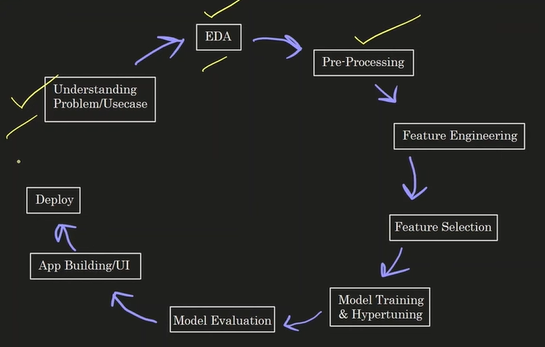

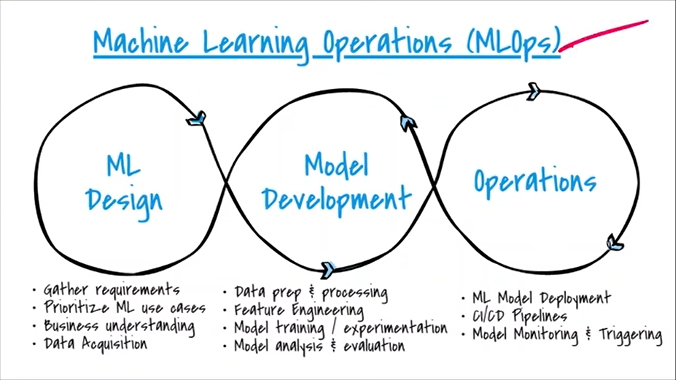

MLOPS -> (DATA ENGINEER + DATA SCIENTIST + SOFTWARE DEVELOPMENT ENGINEER + OPERATIONS)

# GIT AND GITHUB

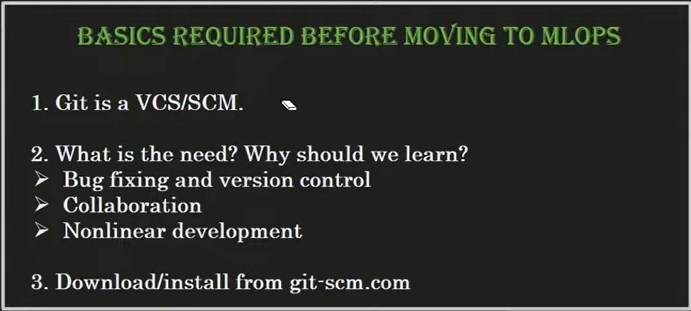

Git is a version control system/source code manager

## Bug fixing and version control

(if you got a bug today, but everything was fine till yesterday, rollback to yesterday's version)

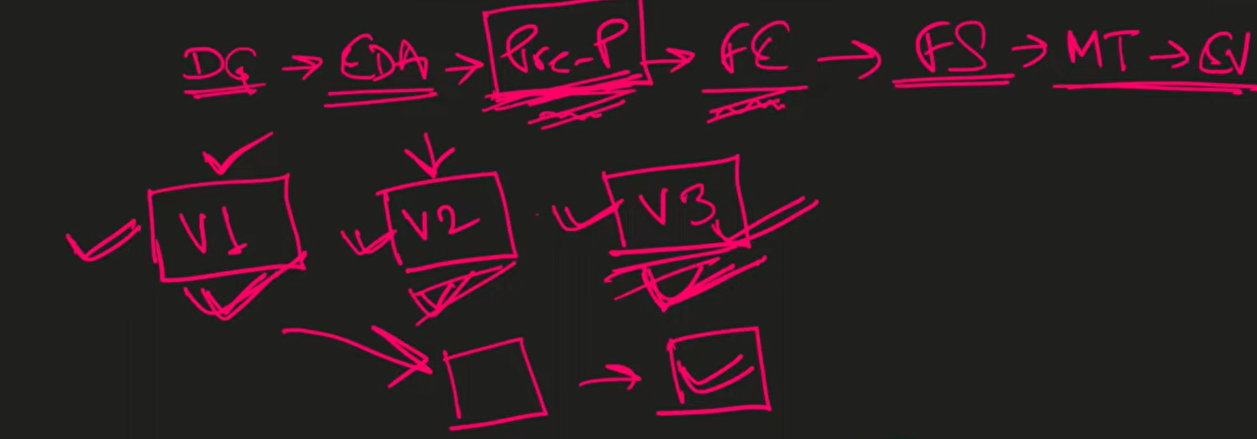

v1 : from data gathering to preprocessing

v2 : from data gathering to feature selection

v3 : from data gathering to evaluation

rollback to versions if needed in case of bugs

## collaboration

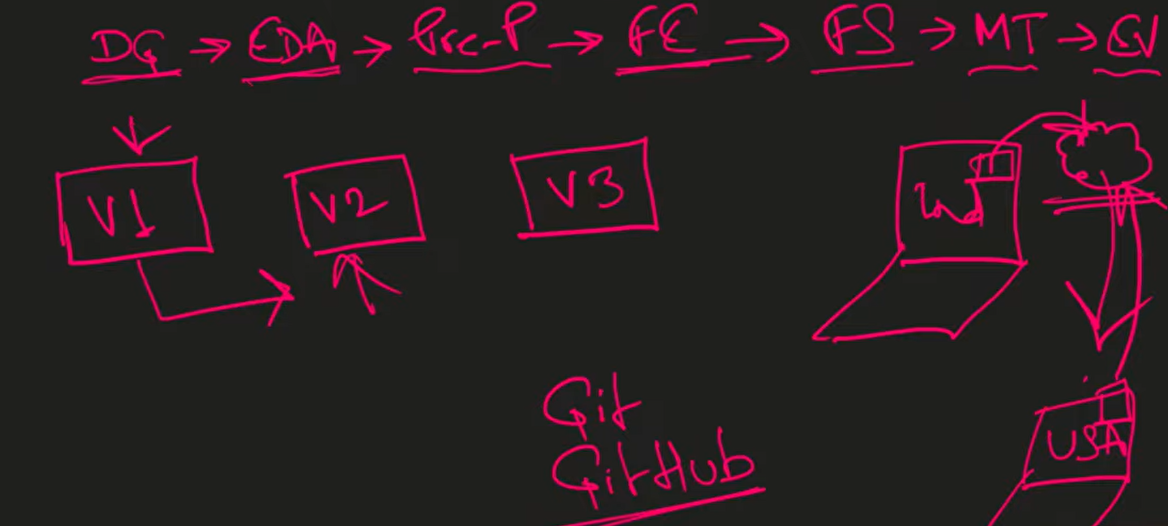

split responsibilities

DG to Prepr -> handled by user A -> saved in version 1

FE to FS -> handled by user B -> point of start is version 1 and from DG to FS is version 2

then remaining work handled by both collectively.

the other way is cloud storage. work on your local system and save the copy to the cloud -> ver 1

your colleague pulls from the cloud and begins the work from that point and saves the copy to cloud -> ver 2




## non linear development

you found out the model is not performing well during model evaluation.

so you are working on model training by trying different algorithms and hypertuning each algo

your colleague is trying a different approach by creating a branch from the preprocessing stage

he is working on the preprocessing, FE, FS, and then finally merging it with the model training.

1st approach : from DG to MT

2nd approach : from Preprocessing to MT

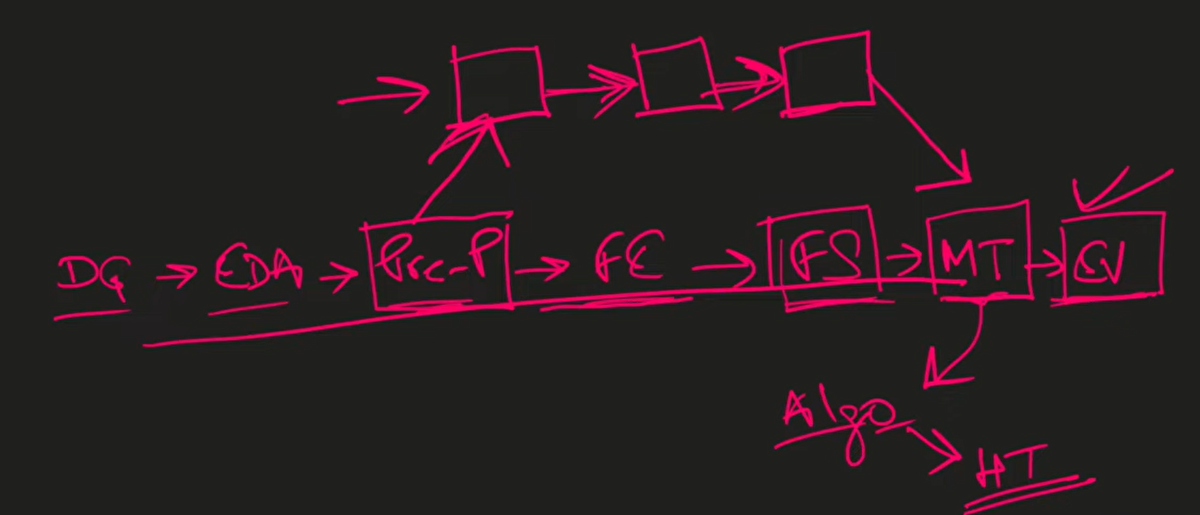

## BASIC SETUP

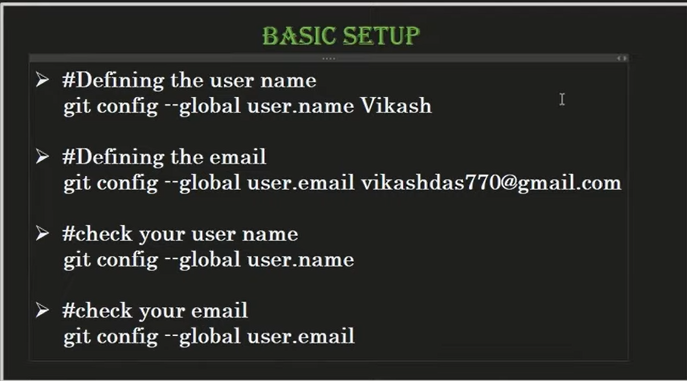

## GIT ARCHITECTURE

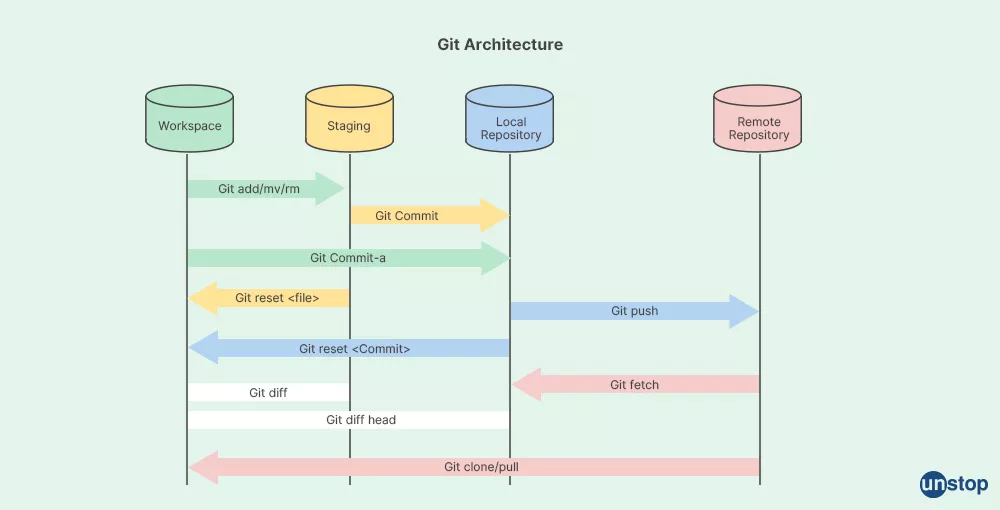

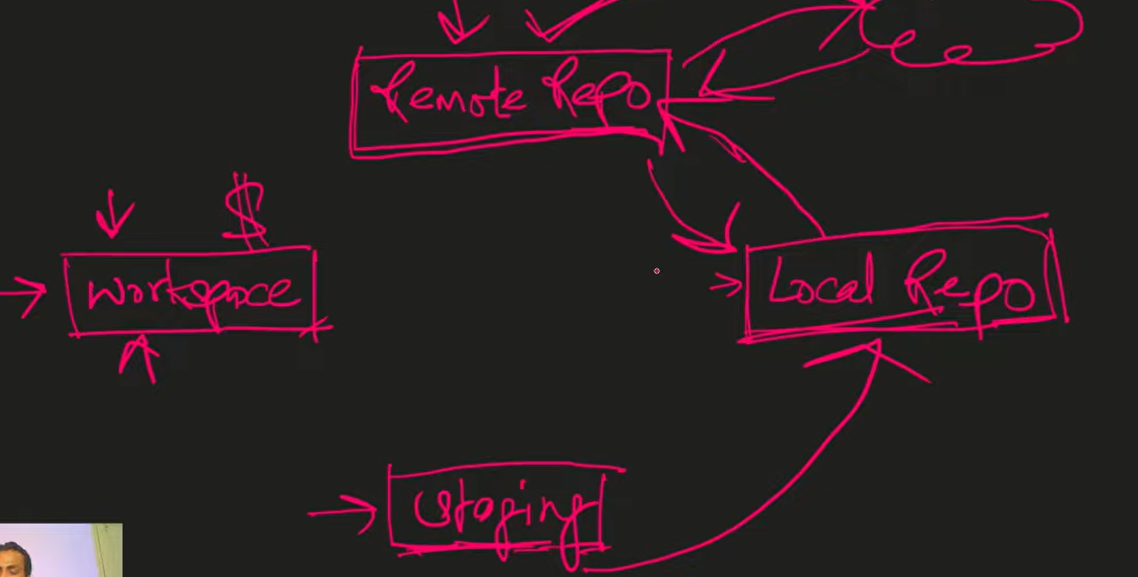

workspace -> staging -> local repo -> remote repo

workspace -> you dont have control

staging -> you have full control


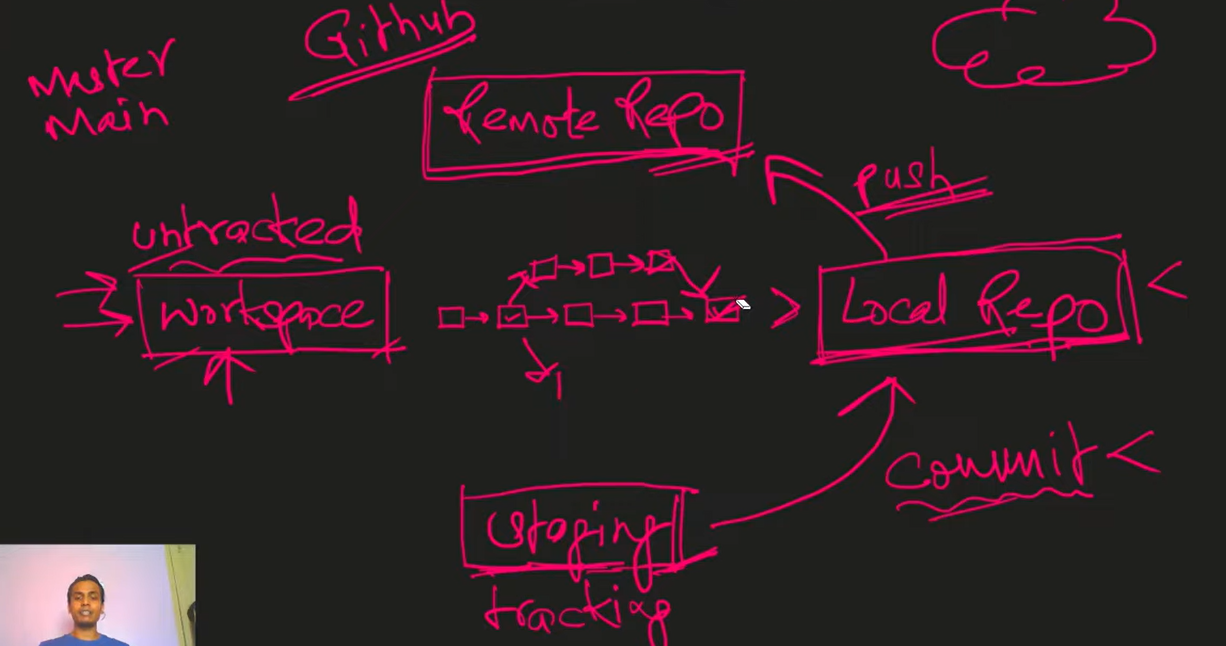

1. when you create a folder (that is your workspace) and git doesn't have access to the inside of the repo.

2. initialise the git repo, it will get inside the repo, and see there are files in the workspace which is untracked

3. brings it to the staging area for tracking (means every line of code change, code addition, etc is tracked)

4. then once we feel the data gathering till preprocessing done here is fine enough we commit ,i.e we save a version of this work done till preprocessing in our local repo

5. and for safety reasons we push this to the remote repo

1. the straightforward flow is called master/main

2. and if someone wants to work from a certain point to enhance the performance of the model, a branch can be created i.e start working from preprocessing stage -> feature selection and merge it with the model training.



> Ctrl + ~ -> to open terminal in VS Code



## BASIC COMMANDS

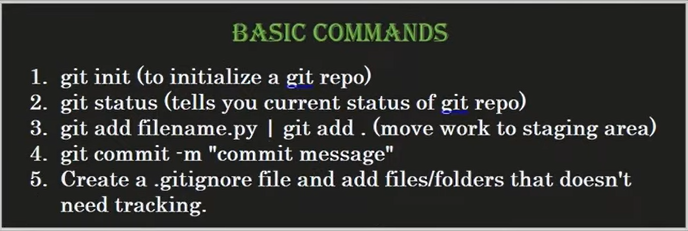

save the code version in local repo



```
PS D:\MLOPS> git status
fatal: not a git repository (or any of the parent directories): .git
PS D:\MLOPS> git init
Initialized empty Git repository in D:/MLOPS/.git/
PS D:\MLOPS> git status
On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
        first.py

nothing added to commit but untracked files present (use "git add" to track)
PS D:\MLOPS> git add first.py
PS D:\MLOPS> git status
On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
        new file:   first.py

PS D:\MLOPS> git status
On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
        new file:   first.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
        delete.py
```



commit message should indicate what work was done in that version

for ex : eda stage complete, features created on feature engineering stage



```
On branch master

No commits yet

Changes to be committed:
        new file:   first.py

[master (root-commit) 417bcef] 1 - first commit
 1 file changed, 1 insertion(+)
 create mode 100644 first.py
PS D:\MLOPS> git status
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
        modified:   first.py

no changes added to commit (use "git add" and/or "git commit -a")
PS D:\MLOPS> git status
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
        modified:   first.py

no changes added to commit (use "git add" and/or "git commit -a")
PS D:\MLOPS> git add first.py
PS D:\MLOPS> git status
On branch master
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        modified:   first.py

PS D:\MLOPS> git commit -m "2 - second commit"
[master 26fbb6b] 2 - second commit
 1 file changed, 2 insertions(+), 1 deletion(-)
PS D:\MLOPS> git status
On branch master
nothing to commit, working tree clean
```



.gitignore -> the files git shouldn't see, forget untracking.



you can add the files which you dont want git to maintain a version of, or the files which you dont want git to track, or the files which you dont want to push to the repo

for ex : aws credentials

no extra code written in staging area from the time the latest code version is saved in the local repo. -> is the meaning of -> nothing to commit, working tree clean



```
PS D:\MLOPS> git status
On branch master
Untracked files:
        .gitignore
        delete.txt

nothing added to commit but untracked files present (use "git add" to track)
PS D:\MLOPS> git status
On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
        .gitignore

nothing added to commit but untracked files present (use "git add" to track)
PS D:\MLOPS> git add .gitignore
PS D:\MLOPS> git status
On branch master
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   .gitignore

PS D:\MLOPS> git commit -m "3 - .gitignore added"
[master 23596b2] 3 - .gitignore added
 1 file changed, 1 insertion(+)
 create mode 100644 .gitignore
PS D:\MLOPS> git status
On branch master
nothing to commit, working tree clean
```





## SEEING COMMITS

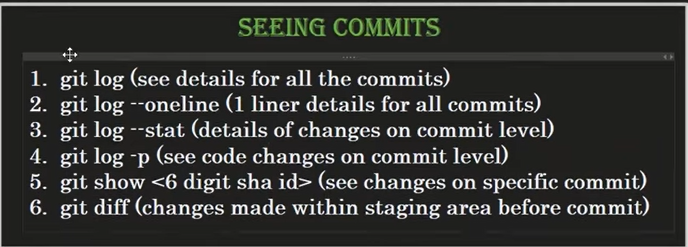



```
anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git log
commit 23596b2adf66b3498c67a295804b3878696969f8 (HEAD -> master)
Author: curiouscurrent <divakardivi1963@gmail.com>
Date:   Mon Jan 5 20:27:14 2026 +0530

    3 - .gitignore added

commit 26fbb6b919acdfdf3e9520e7b976fd83f957b40a
Author: curiouscurrent <divakardivi1963@gmail.com>
Date:   Mon Jan 5 20:03:40 2026 +0530

    2 - second commit

commit 417bcef1ac4b51ba3ce0a2a777ba4dbfaf34b358
Author: curiouscurrent <divakardivi1963@gmail.com>
Date:   Mon Jan 5 19:49:05 2026 +0530

    1 - first commit

```



> oldest commit at the bottom

> unique identification number(SHA ID) assigned to each commit

**HEAD** is a reference that points to the recent commit on your existing branch



```
$ git log --oneline
23596b2 (HEAD -> master) 3 - .gitignore added
26fbb6b 2 - second commit
417bcef 1 - first commit

```



gives the first 7 digits of the SHA ID



```
$ git log --stat
commit 23596b2adf66b3498c67a295804b3878696969f8 (HEAD -> master)
Author: curiouscurrent <divakardivi1963@gmail.com>
Date:   Mon Jan 5 20:27:14 2026 +0530

    3 - .gitignore added

 .gitignore | 1 +
 1 file changed, 1 insertion(+)

commit 26fbb6b919acdfdf3e9520e7b976fd83f957b40a
Author: curiouscurrent <divakardivi1963@gmail.com>
Date:   Mon Jan 5 20:03:40 2026 +0530

    2 - second commit

 first.py | 3 ++-
 1 file changed, 2 insertions(+), 1 deletion(-)

commit 417bcef1ac4b51ba3ce0a2a777ba4dbfaf34b358
Author: curiouscurrent <divakardivi1963@gmail.com>
Date:   Mon Jan 5 19:49:05 2026 +0530

    1 - first commit

```





```
$ git show 417bcef
commit 417bcef1ac4b51ba3ce0a2a777ba4dbfaf34b358
Author: curiouscurrent <divakardivi1963@gmail.com>
Date:   Mon Jan 5 19:49:05 2026 +0530

    1 - first commit

diff --git a/first.py b/first.py
new file mode 100644
index 0000000..1d16e64
--- /dev/null
+++ b/first.py
@@ -0,0 +1 @@
+a = "Welcome to Anusha's MLOPS world"
\ No newline at end of file

```



**git diff - shows the after and before comparision
indicated by "a" and "b" respectively**

**rollback to previous version of code**



```
$ git log --oneline --all
23596b2 (HEAD -> master) 3 - .gitignore added
26fbb6b 2 - second commit
417bcef 1 - first commit

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git checkout 417bcef
Note: switching to '417bcef'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 417bcef 1 - first commit

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS ((417bcef...))
$ git checkout master
Previous HEAD position was 417bcef 1 - first commit
Switched to branch 'master'

```



## BRANCHING AND MERGING

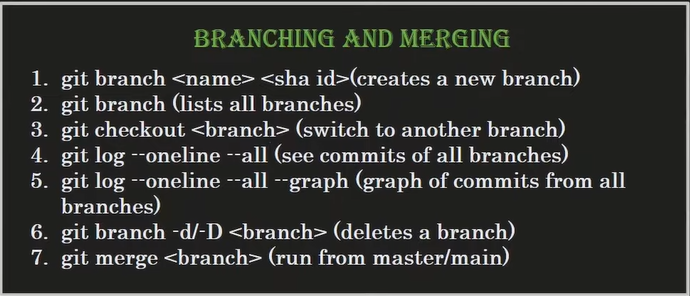

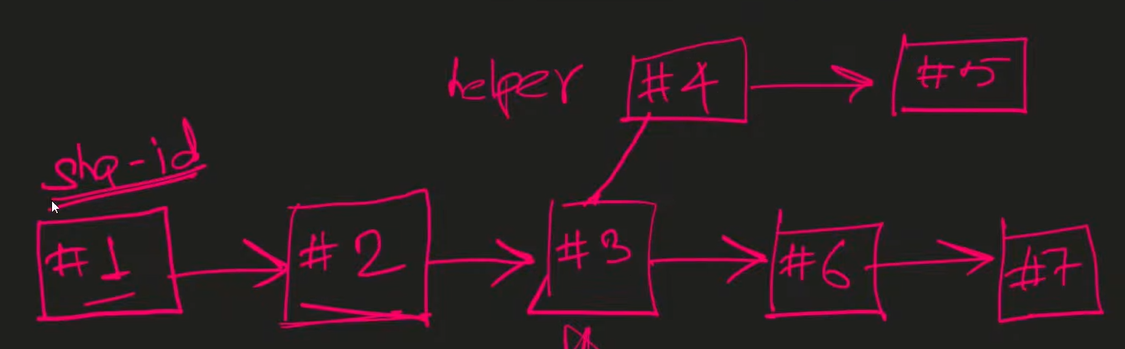

**to make a branch from a specific commit, just provide its sha id along with the branch command**



```
PS D:\MLOPS> git branch helper
PS D:\MLOPS> git branch
  helper
* master
```



**the asterisk shows which branch you are currently on**



```
$ git log --oneline
23596b2 (HEAD -> master, helper) 3 - .gitignore added
26fbb6b 2 - second commit
417bcef 1 - first commit

```



**since we havent made any commit on the helper branch, right now both the helper and the master are on the recent commit**

to switch to another branch :

```
$ git checkout helper
Switched to branch 'helper'

```

```
PS D:\MLOPS> git status
On branch helper
Untracked files:
  (use "git add <file>..." to include in what will be committed)
        helper.py

nothing added to commit but untracked files present (use "git add" to track)
PS D:\MLOPS> git add .
PS D:\MLOPS> git branch
* helper
  master
PS D:\MLOPS> git status
On branch helper
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   helper.py

PS D:\MLOPS> git commit -m "4 - helper work started"
[helper c5f0e3c] 4 - helper work started
 1 file changed, 1 insertion(+)
 create mode 100644 helper.py
```

```
$ git status
On branch helper
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
        modified:   helper.py

no changes added to commit (use "git add" and/or "git commit -a")

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper)
$ git add .

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper)
$ git status
On branch helper
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        modified:   helper.py


anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper)
$ git commit -m "5 - helper work ended"
[helper 8d06324] 5 - helper work ended
 1 file changed, 2 insertions(+), 1 deletion(-)

```

```
$ git checkout helper
Switched to branch 'helper'

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper)
$ git checkout master
Switched to branch 'master'
```


**when you switch from one branch to another, the things in that branch gets deleted temporarily but comes back as soon as we switch to that branch**

```
anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper)
$ git checkout master
Switched to branch 'master'

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git add .

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git commit -m "6 - first commit post helper"
[master f2d8a4b] 6 - first commit post helper
 1 file changed, 3 insertions(+), 1 deletion(-)

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git log --oneline
f2d8a4b (HEAD -> master) 6 - first commit post helper
23596b2 3 - .gitignore added
26fbb6b 2 - second commit
417bcef 1 - first commit

```

```

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git status
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
        modified:   first.py

no changes added to commit (use "git add" and/or "git commit -a")

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git add .

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git commit -m "7 - second commit post helper"
[master ddc3624] 7 - second commit post helper
 1 file changed, 2 insertions(+), 1 deletion(-)
```

```
$ git log --oneline
ddc3624 (HEAD -> master) 7 - second commit post helper
f2d8a4b 6 - first commit post helper
23596b2 3 - .gitignore added
26fbb6b 2 - second commit
417bcef 1 - first commit
```

```
anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper)
$ git log --oneline
8d06324 (HEAD -> helper) 5 - helper work ended
c5f0e3c 4 - helper work started
23596b2 3 - .gitignore added
26fbb6b 2 - second commit
417bcef 1 - first commit
```

```
$ git log --oneline --all --graph
* ddc3624 (HEAD -> master) 7 - second commit post helper
* f2d8a4b 6 - first commit post helper
| * 8d06324 (helper) 5 - helper work ended
| * c5f0e3c 4 - helper work started
|/
* 23596b2 3 - .gitignore added
* 26fbb6b 2 - second commit
* 417bcef 1 - first commit

```

**when you want to delete a branch, switch to another branch first, then delete it**

```
$ git branch -D helper
Deleted branch helper (was 8d06324).
```

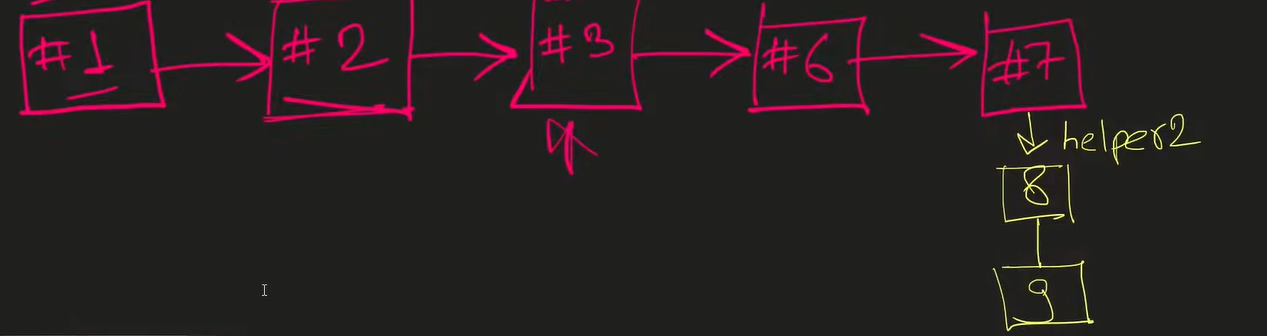

```
anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git branch -D helper
Deleted branch helper (was 8d06324).

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git log --oneline --all --graph
* ddc3624 (HEAD -> master) 7 - second commit post helper
* f2d8a4b 6 - first commit post helper
* 23596b2 3 - .gitignore added
* 26fbb6b 2 - second commit
* 417bcef 1 - first commit

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git branch helper2

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git branch
  helper2
* master

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git checkout helper2
Switched to branch 'helper2'

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper2)
$ git add .

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper2)
$ git status
On branch helper2
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   helper2.py


anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper2)
$ git commit -m "8 - first commit of helper2"
[helper2 677cbe9] 8 - first commit of helper2
 1 file changed, 1 insertion(+)
 create mode 100644 helper2.py

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper2)
$ git log --oneline --all --graph
* 677cbe9 (HEAD -> helper2) 8 - first commit of helper2
* ddc3624 (master) 7 - second commit post helper
* f2d8a4b 6 - first commit post helper
* 23596b2 3 - .gitignore added
* 26fbb6b 2 - second commit
* 417bcef 1 - first commit

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper2)
$ git add .

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper2)
$ git status
On branch helper2
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        modified:   helper2.py


anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper2)
$ git commit -m "9 - second commit of helper2"
[helper2 520eaf2] 9 - second commit of helper2
 1 file changed, 2 insertions(+), 1 deletion(-)

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (helper2)
$ git log --oneline --all --graph
* 520eaf2 (HEAD -> helper2) 9 - second commit of helper2
* 677cbe9 8 - first commit of helper2
* ddc3624 (master) 7 - second commit post helper
* f2d8a4b 6 - first commit post helper
* 23596b2 3 - .gitignore added
* 26fbb6b 2 - second commit
* 417bcef 1 - first commit
```

**when you want to merge your other branch to master branch, first switch to master branch**

all the work done by helper branch that is the code from 1 -> 9 will be merged with 7 (1->7 + 7->9)

```
anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git merge helper2
Updating ddc3624..520eaf2
Fast-forward
 helper2.py | 2 ++
 1 file changed, 2 insertions(+)
 create mode 100644 helper2.py

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git branch -d helper2
Deleted branch helper2 (was 520eaf2).
```

**HANDLING MERGE CONFLICT**
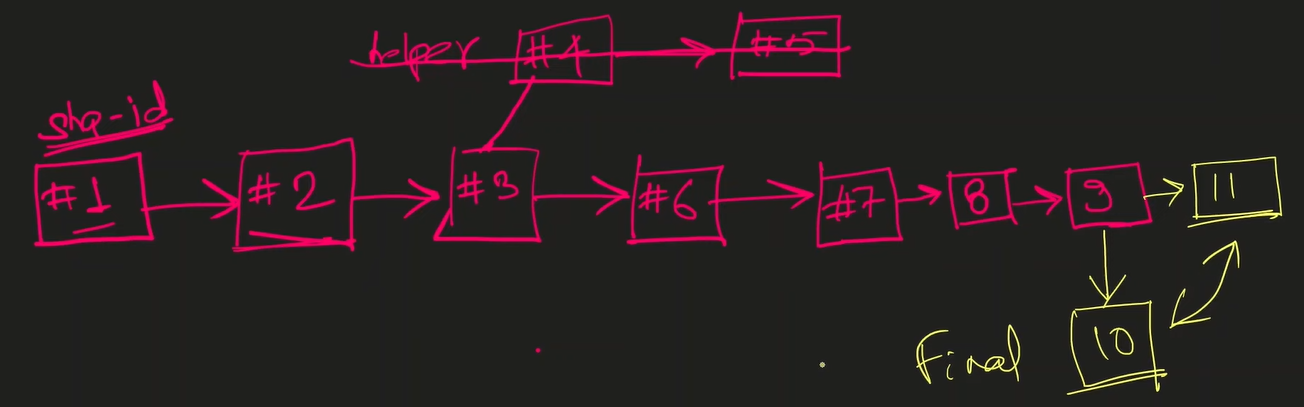

```
$ git log --oneline --all --graph
* 520eaf2 (HEAD -> master) 9 - second commit of helper2
* 677cbe9 8 - first commit of helper2
* ddc3624 7 - second commit post helper
* f2d8a4b 6 - first commit post helper
* 23596b2 3 - .gitignore added
* 26fbb6b 2 - second commit
* 417bcef 1 - first commit
```

```
anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git branch final

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git branch
  final
* master

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git checkout final
Switched to branch 'final'

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (final)
$ git add .

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (final)
$ git commit -m "10 - final branch commit"
[final ceccfef] 10 - final branch commit
 1 file changed, 3 insertions(+), 1 deletion(-)

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (final)
$ git log --oneline --all --graph
* ceccfef (HEAD -> final) 10 - final branch commit
* 520eaf2 (master) 9 - second commit of helper2
* 677cbe9 8 - first commit of helper2
* ddc3624 7 - second commit post helper
* f2d8a4b 6 - first commit post helper
* 23596b2 3 - .gitignore added
* 26fbb6b 2 - second commit
* 417bcef 1 - first commit
```

```
$ git checkout master
Switched to branch 'master'

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git add .

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git commit -m "11 - final commit of master"
[master 7b39697] 11 - final commit of master
 1 file changed, 3 insertions(+), 1 deletion(-)

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git log --oneline --all --graph
* 7b39697 (HEAD -> master) 11 - final commit of master
| * ceccfef (final) 10 - final branch commit
|/
* 520eaf2 9 - second commit of helper2
* 677cbe9 8 - first commit of helper2
* ddc3624 7 - second commit post helper
* f2d8a4b 6 - first commit post helper
* 23596b2 3 - .gitignore added
* 26fbb6b 2 - second commit
* 417bcef 1 - first commit
```

**when you do a merge you should always be on the master branch**

```

anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master)
$ git merge final
Auto-merging first.py
CONFLICT (content): Merge conflict in first.py
Automatic merge failed; fix conflicts and then commit the result.
```

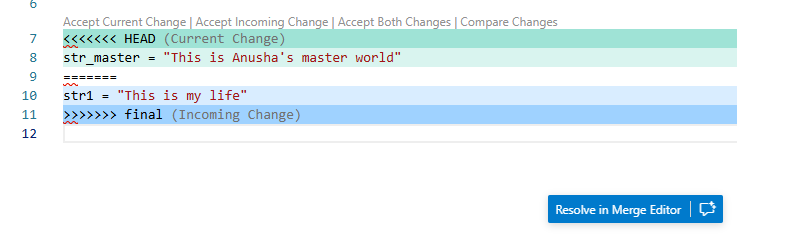

1. **accept current change means , accept the code that is written by the current branch on line number 7**

2. **accept incoming change means, accept the code that is written by the other branch on line number 7**

3. **accept both changes means, accept the code that is written by both the branches on line number 7**

4. **compare changes opens a split window**

```
anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master|MERGING)
$ git log --oneline
7b39697 (HEAD -> master) 11 - final commit of master
520eaf2 9 - second commit of helper2
677cbe9 8 - first commit of helper2
ddc3624 7 - second commit post helper
f2d8a4b 6 - first commit post helper
23596b2 3 - .gitignore added
26fbb6b 2 - second commit
417bcef 1 - first commit
```

## WORKING WITH REMOTE REPO

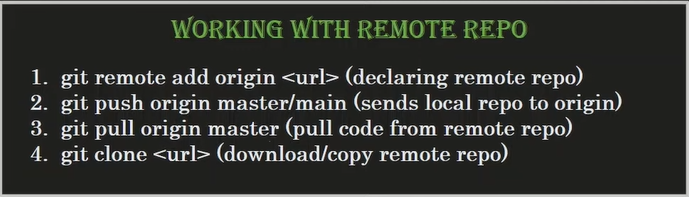

```
anush@DESKTOP-V6K9VUM MINGW64 /d/MLOPS (master|MERGING)
$ git remote add origin https://github.com/curiouscurrent/git-prod.git
```

when we do this git will get to know the address of the remote repo

git push origin main -> means push from local repo to remote repo's main branch

## UNDERSTANDING SOFTWARE VERSIONS

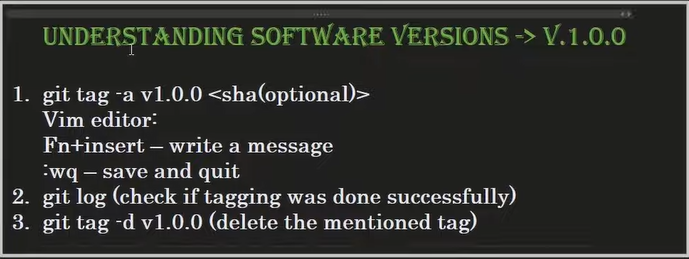

last number in V.1.0.0 -> minor bug fix in that version

last but one number in V.1.0.0 -> addition in feature or functionality
(python 3.7 -> completely new version python 3.8)

if the first number changes -> it means 2 incompatible softwares
ex : python2 and python3 are not at all compatible with each other.

```
$ git log --oneline
26e2253 (HEAD -> master, origin/master) merge conflict resolved
7b39697 11 - final commit of master
ceccfef (final) 10 - final branch commit
520eaf2 9 - second commit of helper2
677cbe9 8 - first commit of helper2
ddc3624 7 - second commit post helper
f2d8a4b 6 - first commit post helper
23596b2 (tag: v1.0.0) 3 - .gitignore added
26fbb6b 2 - second commit
417bcef 1 - first commit
```